<a href="https://colab.research.google.com/github/navya645/devtern/blob/main/15_Uber_Trips_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the necessary Python libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("uber-raw-data-may14.csv")

In [2]:
data

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
...,...,...,...,...
22770,5/19/2014 8:00:00,40.7220,-73.9776,B02512
22771,5/19/2014 8:00:00,40.6832,-73.9795,B02512
22772,5/19/2014 8:00:00,40.7143,-73.9878,B02512
22773,5/19/2014 8:01:00,40.6797,-73.9783,B02512


In [3]:
data["Date/Time"]=data["Date/Time"].map(pd.to_datetime)
data

,Date/Time,Lat,Lon,Base
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512
...,...,...,...,...
22770,2014-05-19 08:00:00,40.7220,-73.9776,B02512
22771,2014-05-19 08:00:00,40.6832,-73.9795,B02512
22772,2014-05-19 08:00:00,40.7143,-73.9878,B02512
22773,2014-05-19 08:01:00,40.6797,-73.9783,B02512


# prepare the data according to days and hours

In [4]:
data["day"]=data["Date/Time"].apply(lambda x: x.day)
data["weekdays"]=data["Date/Time"].apply(lambda x: x.weekday())
data["hour"]=data["Date/Time"].apply(lambda x: x.hour)

In [5]:
data

,Date/Time,Lat,Lon,Base,day,weekdays,hour
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,1,3,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,1,3,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,1,3,0
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,1,3,0
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,1,3,0
...,...,...,...,...,...,...,...
22770,2014-05-19 08:00:00,40.7220,-73.9776,B02512,19,0,8
22771,2014-05-19 08:00:00,40.6832,-73.9795,B02512,19,0,8
22772,2014-05-19 08:00:00,40.7143,-73.9878,B02512,19,0,8
22773,2014-05-19 08:01:00,40.6797,-73.9783,B02512,19,0,8


# look at each day to see on which day the Uber trips were highest

<ipython-input-6-d29b96ca0324>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["day"])


<Axes: xlabel='day', ylabel='Density'>

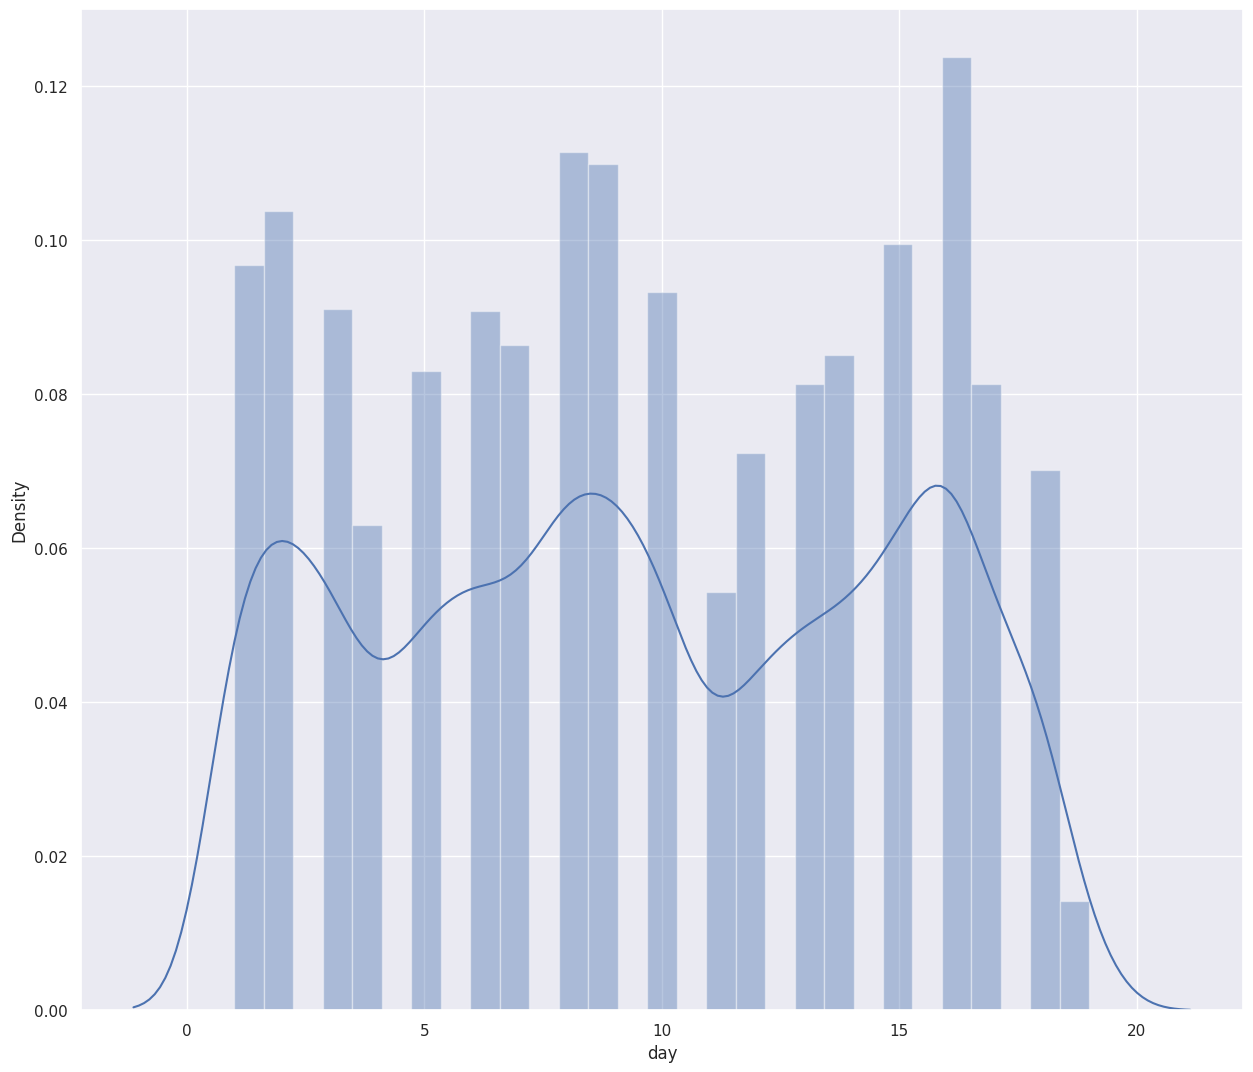

In [6]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(data["day"])


# analyse the Uber trips according to the hours

<ipython-input-7-87e9f10615aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["hour"])


<Axes: xlabel='hour', ylabel='Density'>

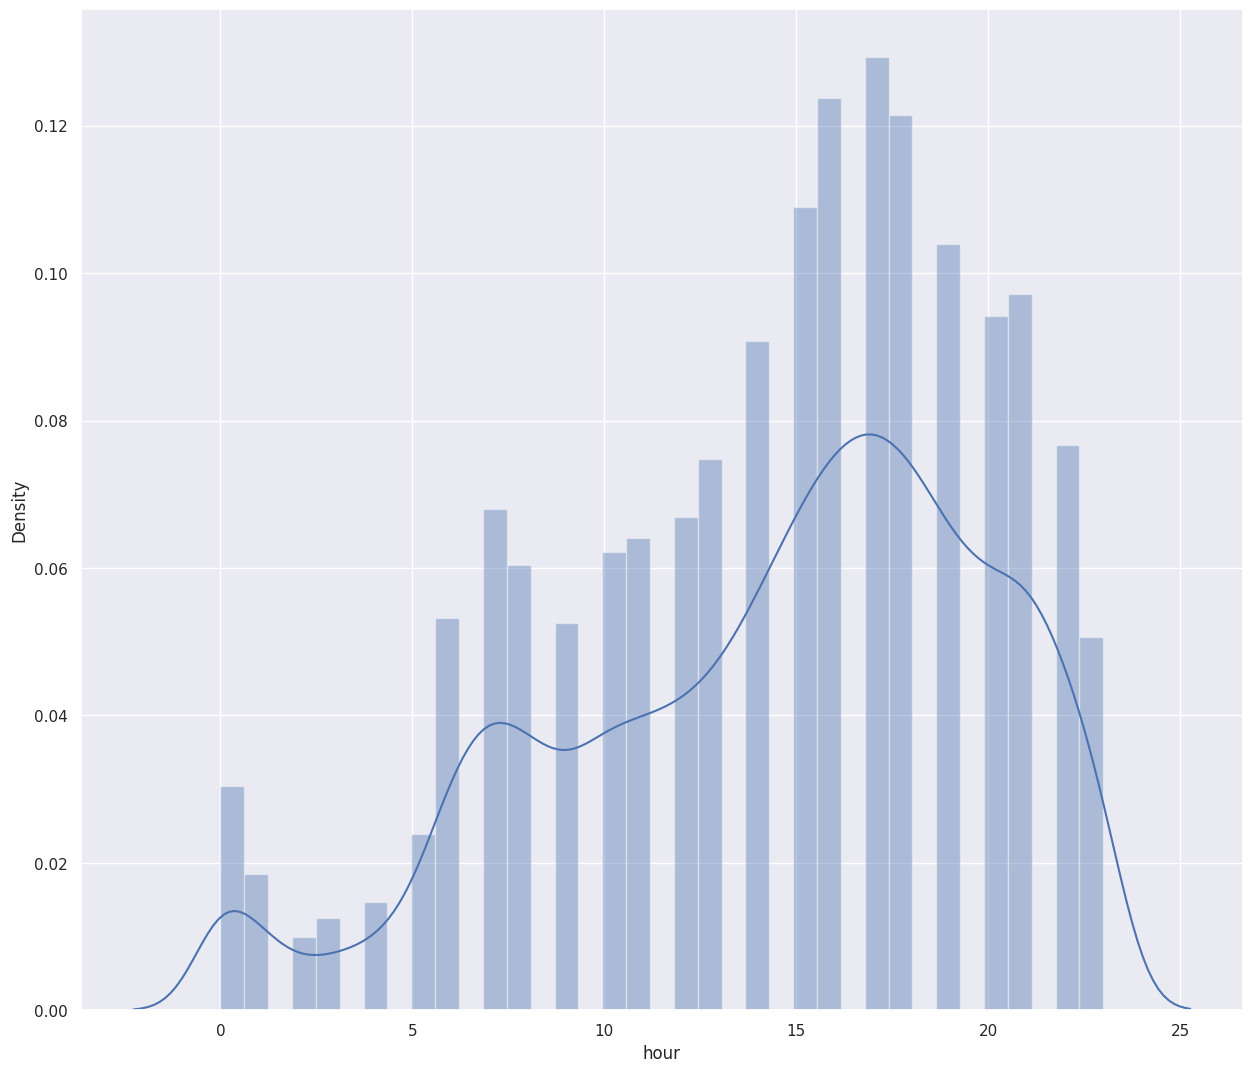

In [7]:
sns.distplot(data["hour"])

# analyse the Uber trips according to the weekdays

<ipython-input-8-25638e14af01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["weekdays"])


<Axes: xlabel='weekdays', ylabel='Density'>

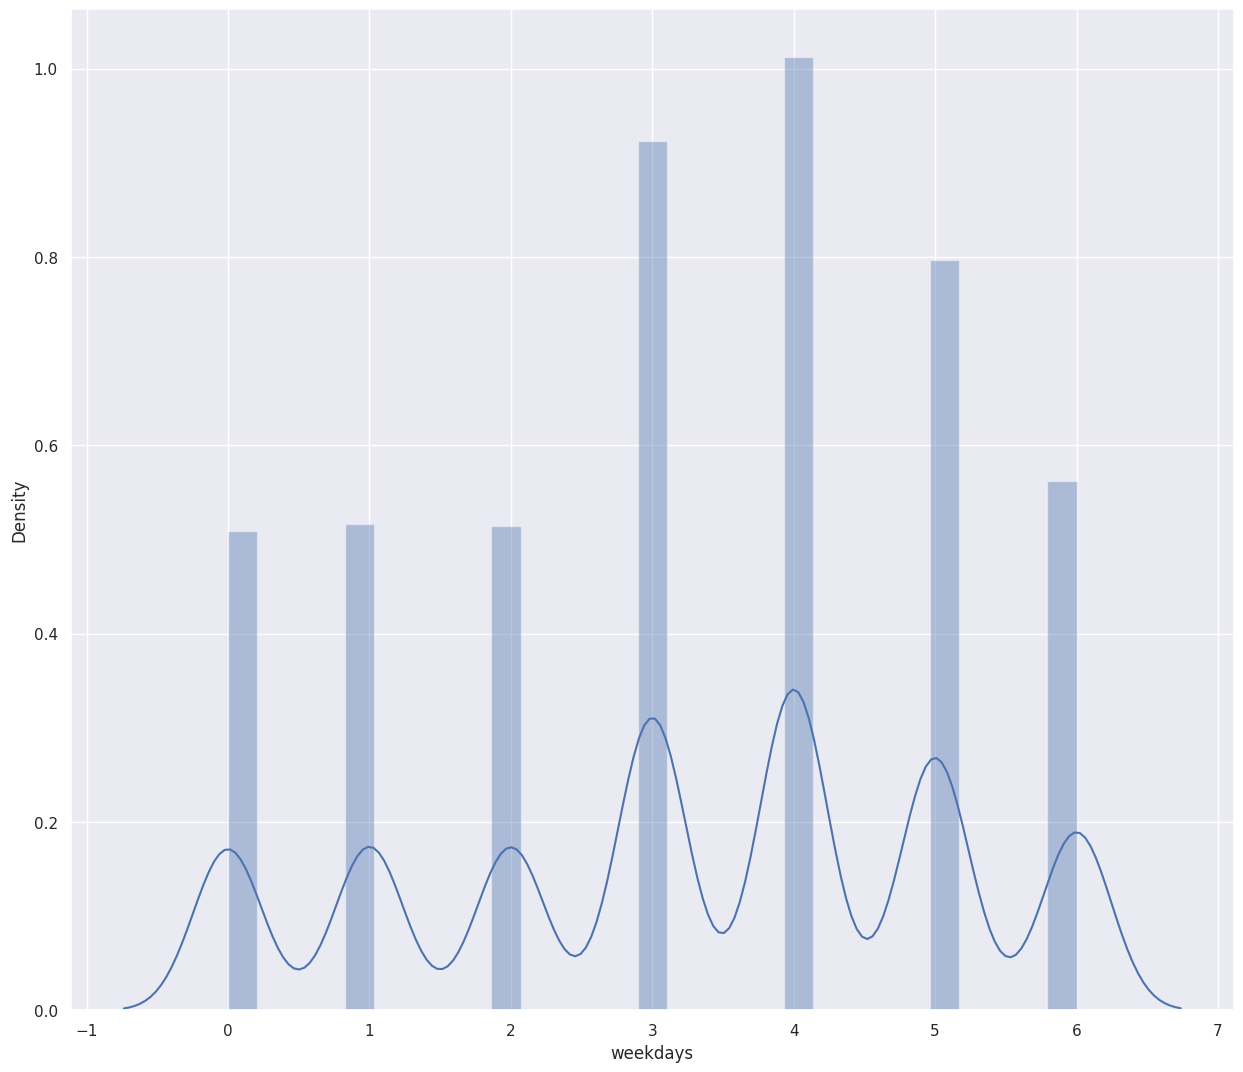

In [8]:
sns.distplot(data["weekdays"])

# look at the correlation of hours and weekdays

<Axes: xlabel='hour', ylabel='weekdays'>

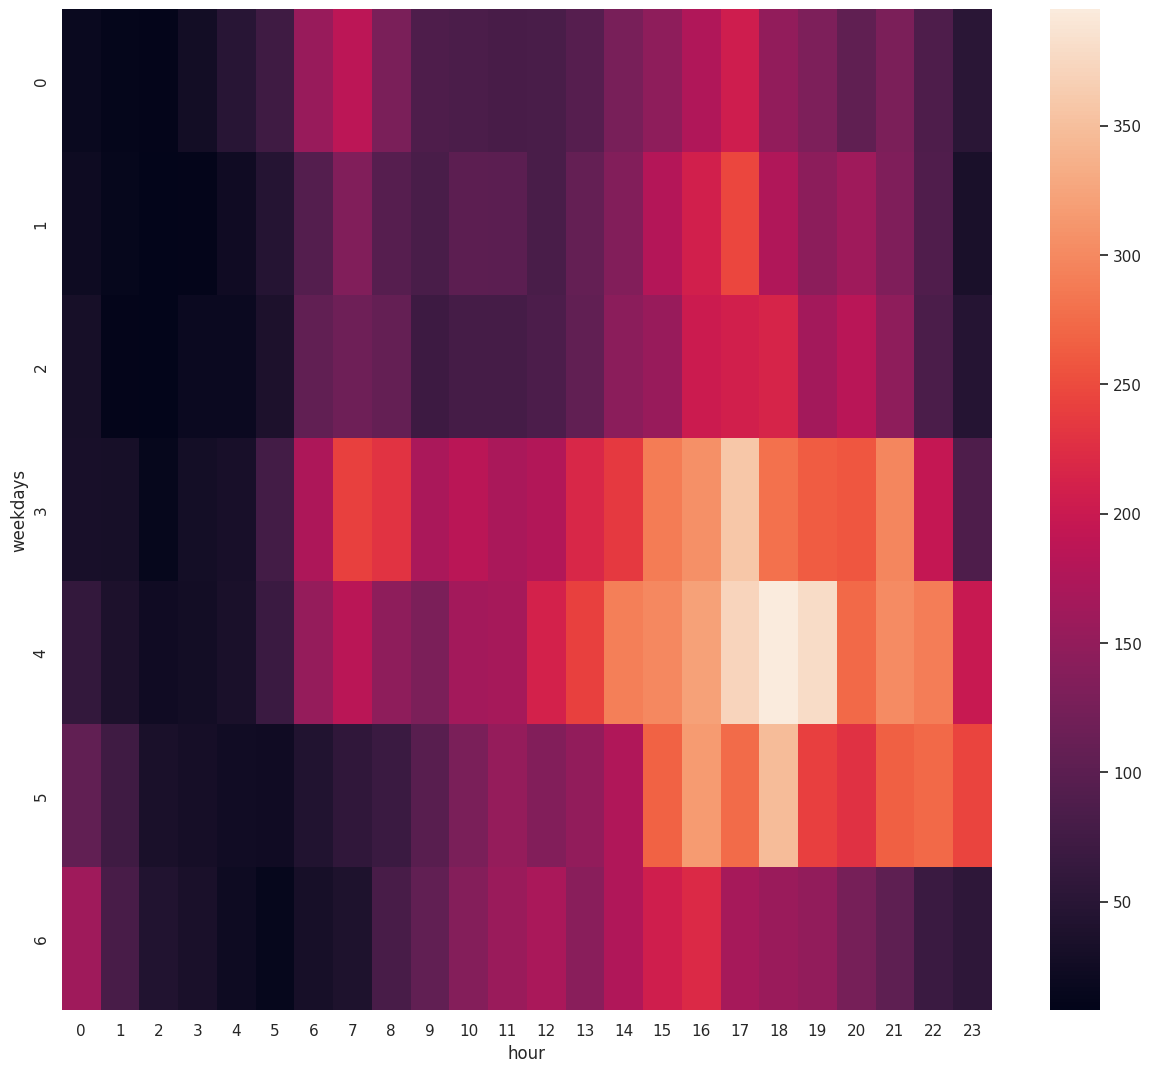

In [9]:
df=data.groupby(["weekdays","hour"]).apply(lambda x: len(x))
df=df.unstack()
sns.heatmap(df,annot=False)

# plot the density of Uber trips according to the regions of the New Your city

<Axes: xlabel='Lon', ylabel='Lat'>

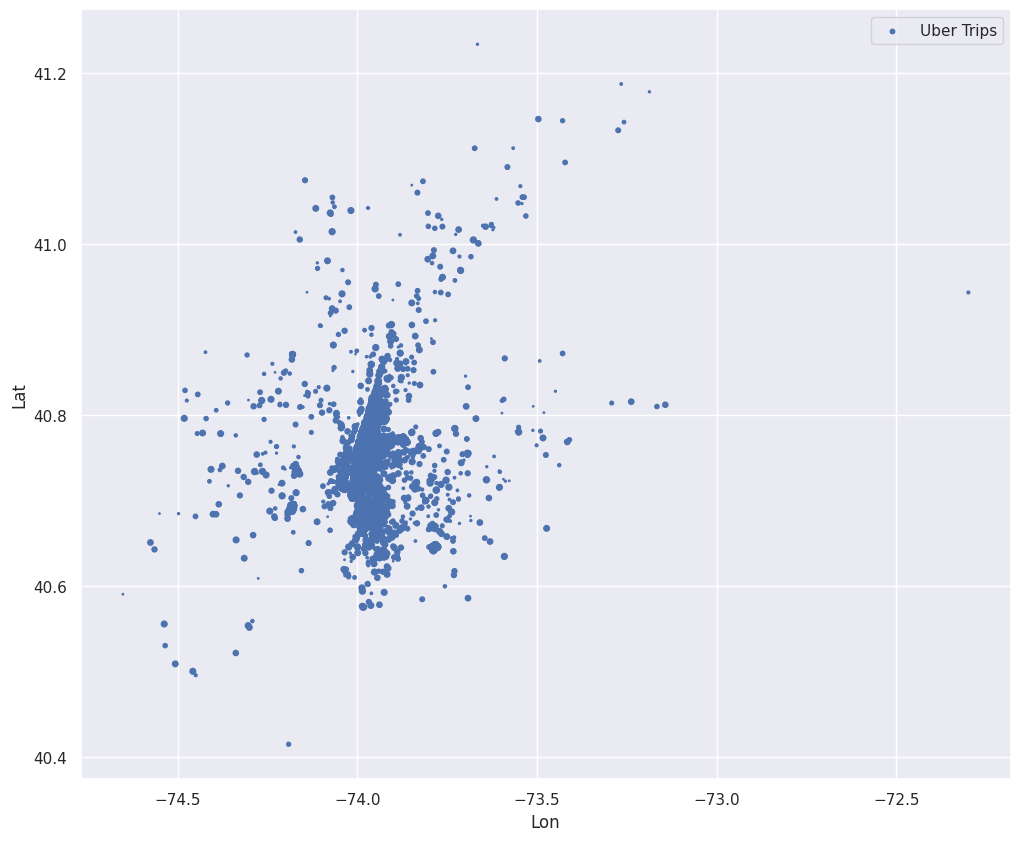

In [10]:
data.plot(kind='scatter',x='Lon', y='Lat', s=data['day'], label='Uber Trips', figsize=(12, 10))